# Imports

In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Deep learning with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
import torchvision.transforms.functional as F
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet18, ResNet18_Weights

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Miscellaneous
import os
import re
import time
import pickle
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [2]:
path = '/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/radset.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = torch.load(path)

In [3]:
b_size = 1
data_loader = DataLoader(data, batch_size = b_size, shuffle = True, pin_memory = True, num_workers = 2)

# Evaluation Loop

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


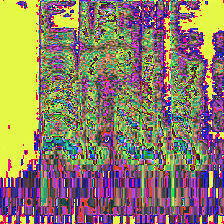

Prediction:  disgust


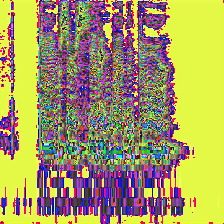

Prediction:  sad


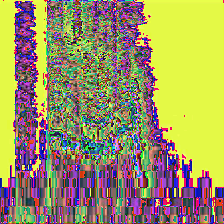

Prediction:  surprised


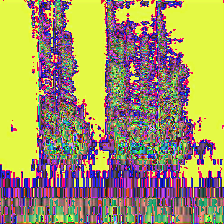

Prediction:  sad


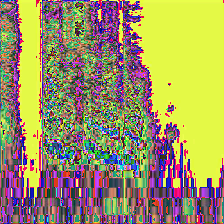

Prediction:  sad


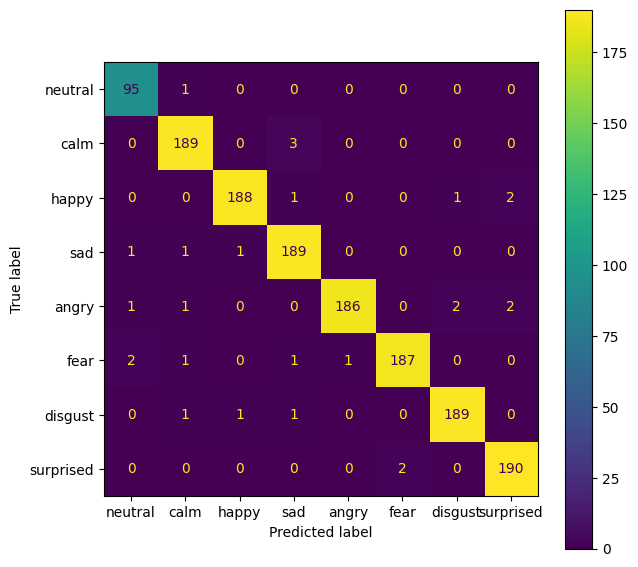

In [15]:
model = torch.load('/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/amodel.pt')
model.eval()

predicts = []
correct = []

mapping = ["neutral", "calm", "happy", "sad", "angry", "fear", "disgust", "surprised"]
index = 0

def preprocess_again(image, label, batch):
  label = label.squeeze(1)
  return image, label

for image, label in data_loader:
  image, label = preprocess_again(image, label, b_size)
  image = image.cuda()
  label = label.cuda()
  with torch.no_grad():
    y_pred = model(image).to(device)
    _, prediction = y_pred.max(dim=1)
    predicts.append(prediction.item())
    correct.append(label.item())
    if index < 5:
      image = image.squeeze(0)
      image_ = F.to_pil_image(image)
      display(image_)
      print("Prediction: ", mapping[prediction.item()])
  index += 1

confucian = metrics.confusion_matrix(correct, predicts)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confucian, display_labels = mapping)
fig, ax = plt.subplots(figsize=(7,7))
cm_display.plot(ax = ax)
plt.show()

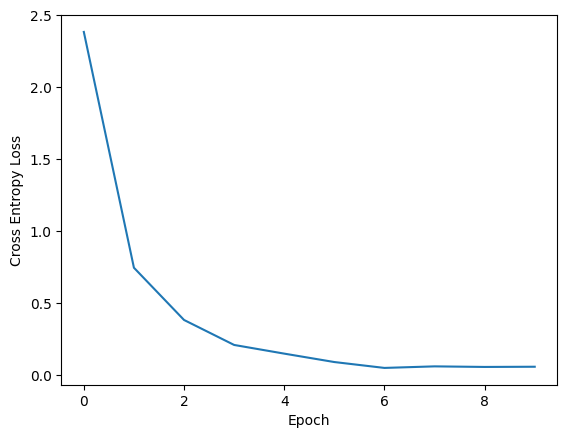

In [17]:
training_loss = [2.3834, 0.7441, 0.3810, 0.2073, 0.1470, 0.0885, 0.0476, 0.0584, 0.0544, 0.0558]

plt.plot(training_loss)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()